# Homework (18 pts) - Linear Regression

## Nisha Dalal nd8288

In [1]:
import numpy as np
import scipy as sp
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import copy
%config InlineBackend.figure_format = 'retina'

In [2]:
from sklearn import datasets
dataset = datasets.load_boston()
print(dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
X = dataset.data
y = dataset.target
features = list(dataset.feature_names)

In [4]:
import pandas as pd
df = pd.DataFrame(X, columns=features)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


1. (3 pts) Standardize the feature data (each column of X) and the target data (y) by centering them on their mean and normalizing by their standard deviation.

In [5]:
X = X - X.mean(axis=0)
X = X / X.std(axis=0)

y = y - y.mean()
y = y / y.std(axis=0)

2. (3 pts) Use pandas to display a table of correlations between each feature in the dataset. Use a color scheme to visually identify highly correlated features. What is the correlation between the two most highly correlated (or anticorrelated) features?

In [6]:
df.corr().style.background_gradient(cmap='cool')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


3. (3 pts) Use seaborn's `pairplot` function to visualize `INDUS` and `AGE` along with the two most highly correlated (or anticorrelated) features identified in #2.

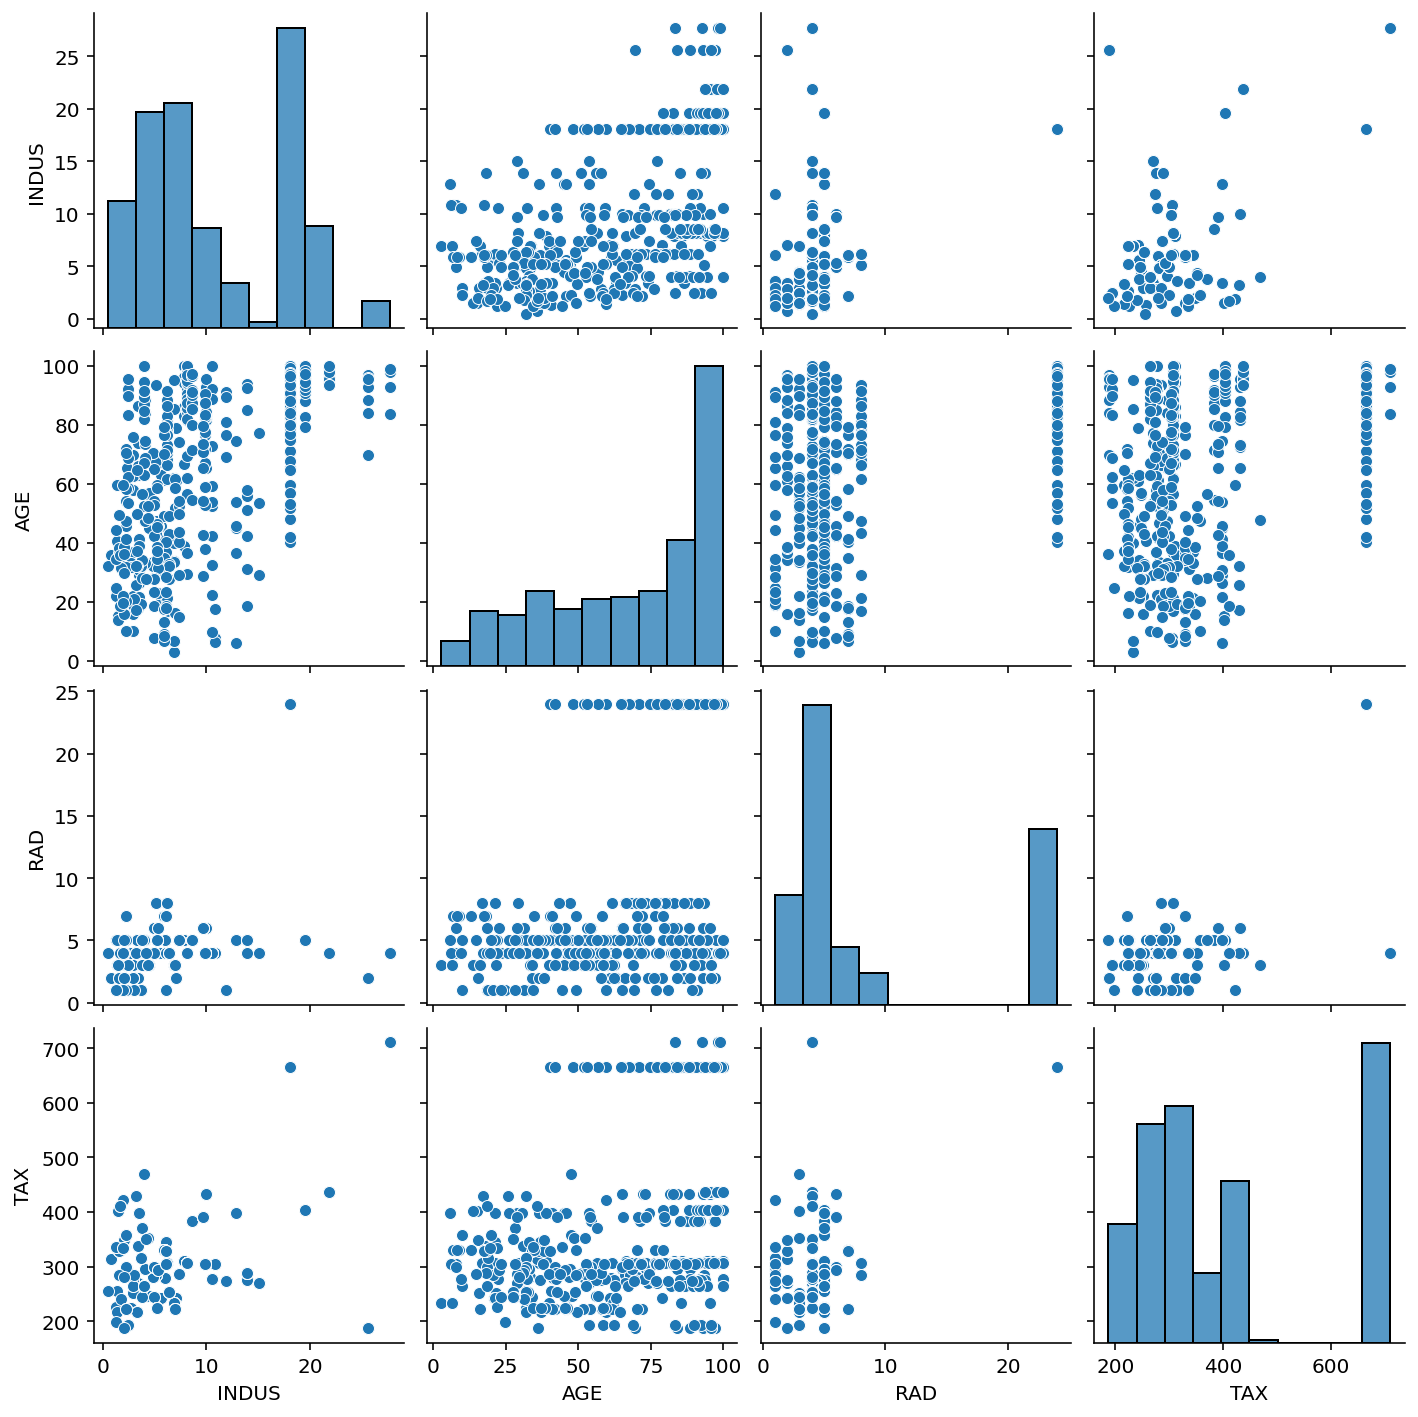

In [7]:
sns.pairplot(df[['INDUS','AGE','RAD','TAX']]);

4. (3 pts) Fit a simple OLS linear regression model to the entire standardized dataset. Should you use a y-intercept or not?

In [8]:
sm_model = sm.OLS(y, X)
results = sm_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.741
Model:                            OLS   Adj. R-squared (uncentered):              0.734
Method:                 Least Squares   F-statistic:                              108.3
Date:                Fri, 16 Apr 2021   Prob (F-statistic):                   3.46e-135
Time:                        16:47:20   Log-Likelihood:                         -376.55
No. Observations:                 506   AIC:                                      779.1
Df Residuals:                     493   BIC:                                      834.0
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1010      0.031     -3.290      0.001      -0.161      -0.041
x2             0.1177      0.035      3.385      0.001       0.049       0.186
x3             0.0153      0.046      0.335      0.738      -0.075       0.105
x4             0.0742      0.024      3.122      0.002       0.027       0.121
x5            -0.2238      0.048     -4.656      0.000      -0.318      -0.129
x6             0.2911      0.032      9.125      0.000       0.228       0.354
x7             0.0021      0.040      0.052      0.958      -0.077       0.081
x8            -0.3378      0.046     -7.406      0.000      -0.427      -0.248
x9             0.2897      0.063      4.618      0.000       0.166       0.413
x10           -0.2260      0.069     -3.283      0.001      -0.361      -0.091
x11           -0.2243      0.031     -7.290      0.000      -0.285      -0.164
x12            0.0924      0.027      3.470      0.001       0.040       0.145
x13           -0.4074      0.039    -10.358      0.000      -0.485      -0.330
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                         9.82
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

5. (3 pts) Show a bar plot of the model coefficients (weights or slopes) for each feature. Put the feature names on the x-axis. Rotate the x-axis labels by 45 degrees and right-align them for visibility. *Hint: see the plt.xticks() function.*

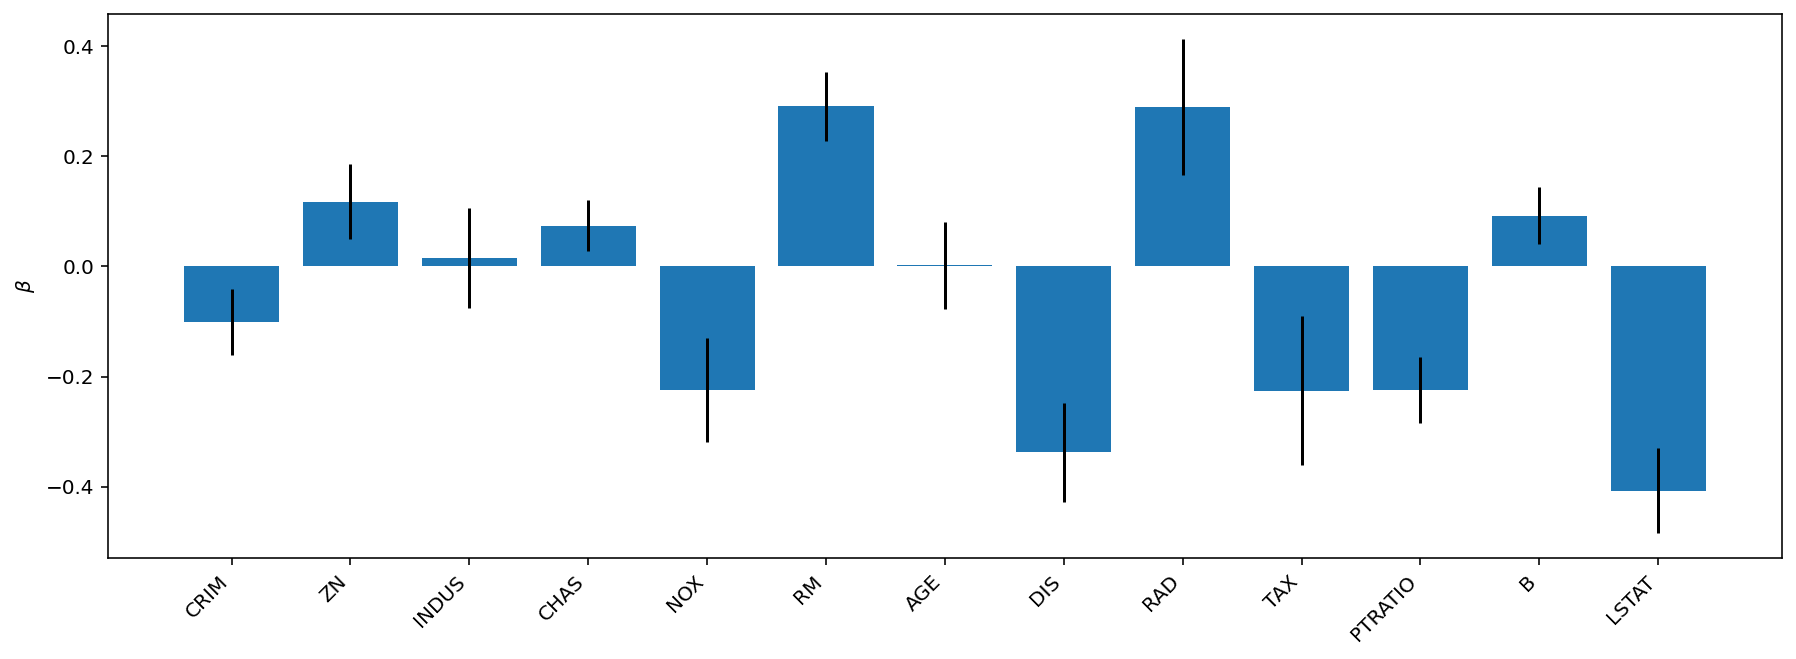

In [9]:
beta = results.params
ci = results.conf_int(alpha=0.05)

n = len(beta)
below = beta - ci[:,0]
above = ci[:,1] - beta

plt.figure(figsize=(15, 5))
plt.bar(range(n), beta, yerr=[below, above])
plt.xticks(range(n), features)
plt.ylabel(r'$\beta$')
plt.xticks(range(n), dataset.feature_names, rotation=45, ha='right')
plt.show()

6. (3 pts) Repeat #4-#5 above, except leave out one of the most highly correlated features. Which feature has the most influence on median house value?

In [10]:
# take out TAX or RAD
sm_model = sm.OLS(y, df.drop(columns=['RAD']))
results = sm_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.728
Model:                            OLS   Adj. R-squared (uncentered):              0.722
Method:                 Least Squares   F-statistic:                              110.3
Date:                Fri, 16 Apr 2021   Prob (F-statistic):                   2.85e-131
Time:                        16:47:20   Log-Likelihood:                         -388.33
No. Observations:                 506   AIC:                                      800.7
Df Residuals:                     494   BIC:                                      851.4
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0074      0.004     -2.106      0.036      -0.014      -0.000
ZN             0.0044      0.002      2.934      0.003       0.001       0.007
INDUS         -0.0061      0.007     -0.932      0.352      -0.019       0.007
CHAS           0.3385      0.095      3.554      0.000       0.151       0.526
NOX           -1.3373      0.356     -3.759      0.000      -2.036      -0.638
RM             0.4944      0.033     15.131      0.000       0.430       0.559
AGE           -0.0006      0.001     -0.388      0.698      -0.003       0.002
DIS           -0.1501      0.021     -7.307      0.000      -0.190      -0.110
TAX         7.276e-05      0.000      0.288      0.773      -0.000       0.001
PTRATIO       -0.0793      0.012     -6.816      0.000      -0.102      -0.056
B              0.0011      0.000      3.753      0.000       0.001       0.002
LSTAT         -0.0537      0.005    -10.005      0.000      -0.064      -0.043
==============================================================================
Omnibus:                      197.971   Durbin-Watson:                   1.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1049.206
Skew:                           1.641   Prob(JB):                    1.47e-228
Kurtosis:                       9.244   Cond. No.                     8.50e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

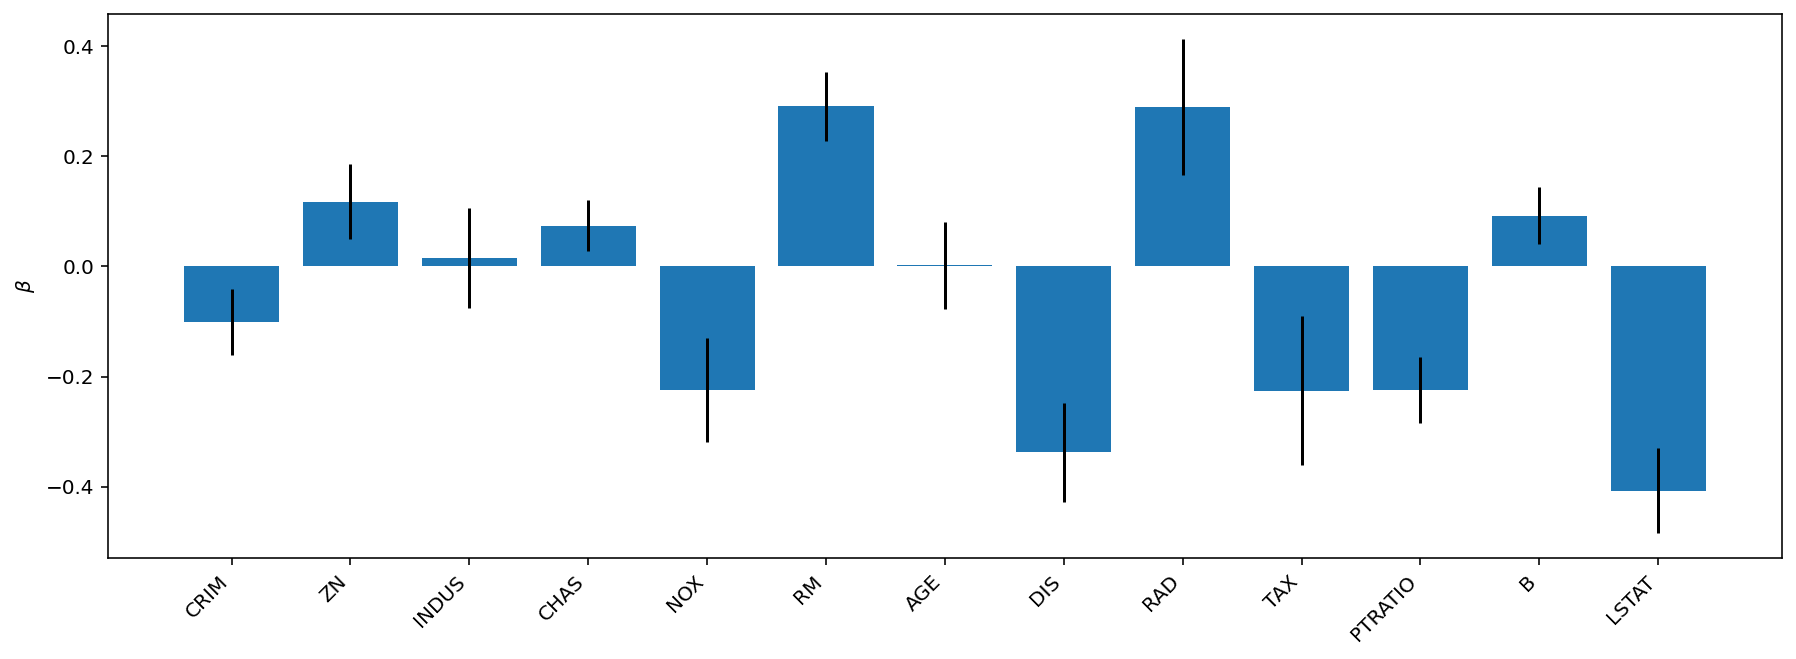

In [11]:
beta = results.params
ci = results.conf_int(alpha=0.05)

n = len(beta)
below = beta - ci[:,0]
above = ci[:,1] - beta

plt.figure(figsize=(15, 5))
plt.bar(range(n), beta, yerr=[below, above])
plt.xticks(range(n), features)
plt.ylabel(r'$\beta$')
plt.xticks(range(n), dataset.feature_names, rotation=45, ha='right')
plt.show()